In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Parameters
num_machines = 1000  # Number of machines
P_Failure = 0.05  # Probability of failure
P_No_Failure = 1 - P_Failure  # Probability of no failure
P_Alert_given_Failure = 0.9  # Probability of an alert given failure
P_Alert_given_No_Failure = 0.2  # Probability of an alert given no failure

# Simulate failure and alert data
np.random.seed(42)  # For reproducibility

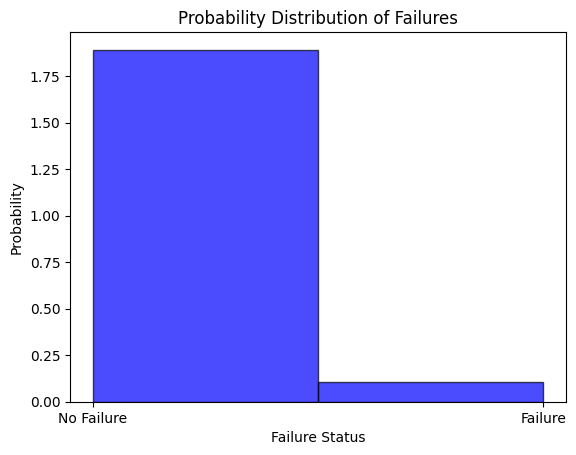

In [4]:
# Simulate failure events (1 for failure, 0 for no failure)
failures = np.random.choice([1, 0], size=num_machines, p=[P_Failure, P_No_Failure])

# Plot the probability distribution of failures
plt.hist(failures, bins=2, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.xlabel('Failure Status')
plt.ylabel('Probability')
plt.title('Probability Distribution of Failures')
plt.show()


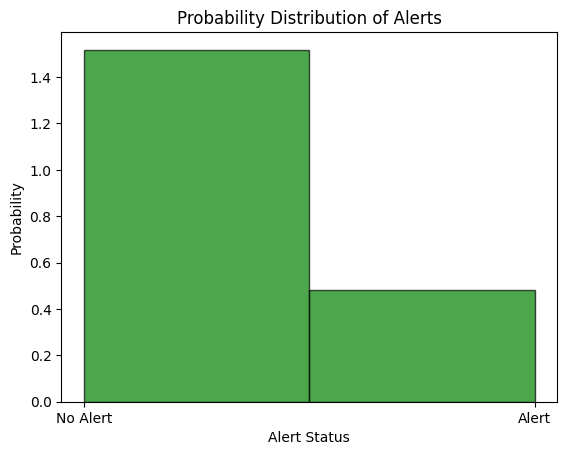

In [8]:
# Simulate alerts based on failure status
alerts = np.array([
    np.random.choice([1, 0], p=[P_Alert_given_Failure, 1 - P_Alert_given_Failure]) if failure == 1
    else np.random.choice([1, 0], p=[P_Alert_given_No_Failure, 1 - P_Alert_given_No_Failure])
    for failure in failures
])

# Plot the probability distribution of alerts
plt.hist(alerts, bins=2, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xticks([0, 1], ['No Alert', 'Alert'])
plt.xlabel('Alert Status')
plt.ylabel('Probability')
plt.title('Probability Distribution of Alerts')
plt.show()

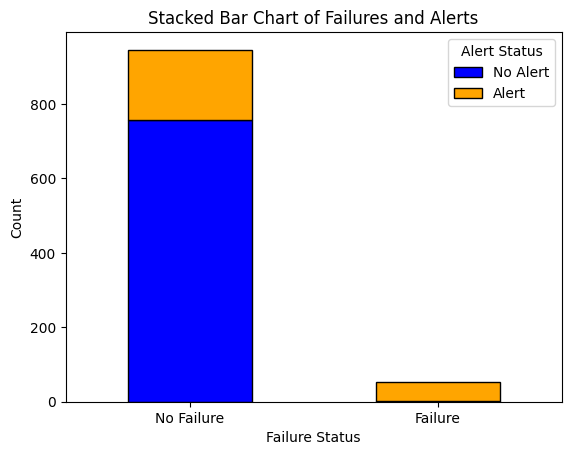

In [9]:
# Create a DataFrame to hold this data
data = pd.DataFrame({
    'Failure': failures,
    'Alert': alerts
})

# Create a stacked bar chart for Failure and Alert counts
failure_alert_counts = data.groupby(['Failure', 'Alert']).size().unstack(fill_value=0)
failure_alert_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'], edgecolor='black')

plt.xlabel('Failure Status')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Failures and Alerts')
plt.xticks(ticks=[0, 1], labels=['No Failure', 'Failure'], rotation=0)
plt.legend(title='Alert Status', labels=['No Alert', 'Alert'])
plt.show()

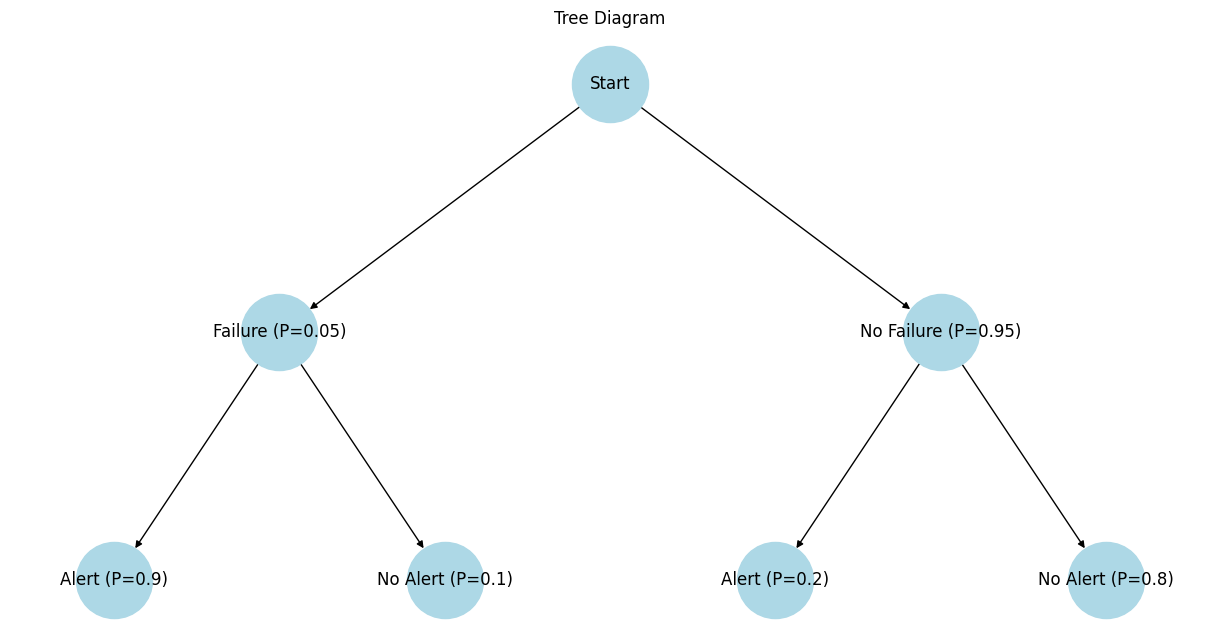

In [39]:
import networkx as nx

# Create a directed graph
tree = nx.DiGraph()

# Add nodes with labels
tree.add_node('A', label='Start')
tree.add_node('B', label='Failure (P=0.05)')
tree.add_node('C', label='No Failure (P=0.95)')
tree.add_node('D', label='Alert (P=0.9)')
tree.add_node('E', label='No Alert (P=0.1)')
tree.add_node('F', label='Alert (P=0.2)')
tree.add_node('G', label='No Alert (P=0.8)')

# Add edges
tree.add_edges_from([
    ('A', 'B'), ('A', 'C'), 
    ('B', 'D'), ('B', 'E'), 
    ('C', 'F'), ('C', 'G')
])

# Manually arrange the nodes for better visualization
pos = {
    'A': (0, 0),
    'B': (-1, -1),
    'C': (1, -1),
    'D': (-1.5, -2),
    'E': (-0.5, -2),
    'F': (0.5, -2),
    'G': (1.5, -2)
}

# Draw the graph without node letters
nx.draw(tree, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_node_attributes(tree, 'label')
nx.draw_networkx_labels(tree, pos, labels=labels)

plt.title('Tree Diagram')
plt.gcf().set_size_inches(12, 6)
plt.show()


In [51]:
# Now, let's apply Bayes' Theorem using the data:
# We know the following from the data:
# P(Failure | Alert) = P(Alert | Failure) * P(Failure) / P(Alert)

# Calculate the total number of alerts
P_Alert_empirical = data['Alert'].sum() / num_machines

# Calculate the probability of failure given alert (P(Failure | Alert)) using Bayes' Theorem
P_Failure_given_Alert_empirical = (P_Alert_given_Failure * P_Failure) / P_Alert_empirical


print(f"P(Failure | Alert) using Bayes' Theorem: {P_Failure_given_Alert_empirical:.4f}")


P(Failure | Alert) using Bayes' Theorem: 0.1867
